# Parte 1: Coordenadas cromáticas
Se expone el algoritmo para utilizar coordenadas cromáticas. Se prueba en una misma imagen con diferentes niveles de brillo.

In [1]:
# Librerías principales
import numpy as np
import cv2 as cv
import matplotlib
from matplotlib import pyplot as plt

# Tipo de visualización
%matplotlib inline

# Versiones de librerías
print("".join(f"{x[0]}: {x[1]}\n" for x in [
    ("Numpy",np.__version__),
    ("openCV",cv.__version__),
    ("Matplotlib",matplotlib.__version__),
]))

Numpy: 1.22.3
openCV: 4.5.5
Matplotlib: 3.5.1



## Imágenes
Se levantan las imágenes que se emplearán como prueba del algoritmo. Se verifica el orden de los canales de color


In [2]:
# Definición de la ruta para levantar las imagenes
PATH = r'D:\Profesion\Disciplinas\vision_computadora_I\practicas\tp_1\data'

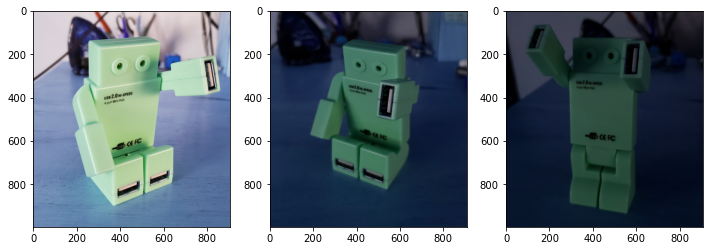

Dimensiones de las imágenes (996, 908, 3)
Dimensiones de las imágenes (996, 908, 3)
Dimensiones de las imágenes (996, 908, 3)


In [3]:

img_cc_1 = cv.imread(os.path.join(PATH, 'CoordCrom_1.png'))
img_cc_2 = cv.imread(os.path.join(PATH, 'CoordCrom_2.png'))
img_cc_3 = cv.imread(os.path.join(PATH, 'CoordCrom_3.png'))

# Verificación si ha levantado las imágenes con los canales correctos y coincide con las originales
fig = plt.figure(figsize=(12, 10))

ax1=plt.subplot(131)
ax1.imshow(img_cc_1)

ax2=plt.subplot(132)
ax2.imshow(img_cc_2)

ax3=plt.subplot(133)
ax3.imshow(img_cc_3)

plt.show()

# Verificación de dimensiones y canales
print(f'Dimensiones de las imágenes {img_cc_1.shape}')
print(f'Dimensiones de las imágenes {img_cc_2.shape}')
print(f'Dimensiones de las imágenes {img_cc_3.shape}')

## Cálculo de las coordenadas cromáticas
Mediante una función se realiza la transformación. El algoritmo implementado es la solución de mínima, aunque no la más óptima. Esto por la aplicación de un bucle por cada dimensión del tensor que representa a la imagen

In [4]:
def coord_crom(input_image, c=1):
    '''
    Función de cálculo de las coordenadas cromáticas
    input_image: imagen a procesar.
    c: contante para cambiar el contastre. Por defecto su valor es 1.    
    '''

    # Se dhace una copia de la imagen de entrada
    image = input_image.copy()
    # Suma de entre píxeles de los canales de color
    image_sum = np.sum(image, axis=2)
    # Indice donde la suma no es nula
    idx = np.where(image_sum!=0)
    
    # Inicialización del array de coordenadas cromáticas con ceros
    coord_crom = np.zeros(image.shape)  

    # Ciclo para calcular las coordenadas cromáticas en cada canal de color
    for k in range(image.shape[2]):
        # Array de dimensiones [n,m] para el canal k del tensor de la imagen
        mask_image = image[...,k]
        # Array de dimensiones [n,m] para el canal k del tensor de las coordenadas cromáticas
        mask_coord_crom = coord_crom[...,k]
        # Cálculo de las coordenadas cromáticas sobre las máscaras en los índices donde la suma no ha sido nula
        mask_coord_crom[idx] = c*mask_image[idx]/image_sum[idx]
        # Se incorpora el cálculo de dimensiones [n,m] al canal correspondiente del tensor de coordenadas crómaticas
        coord_crom[...,k] = mask_coord_crom

    return coord_crom

## Función de normalización
Al aplicar el algoritmo de coordenadas cromáticas, el rango de valores presentes en el array de la imagen es [0,1] de tipo flotante. Por lo que es necesario transformarlos al rango [0,255] de tipo entero de 8 bits. Si $x$ es el valor a transformar, la ecuación es,

$$ \frac{y-0}{x-0} = \frac{255-0}{1-0} $$
$$ y = \frac{(x-0)(255-0)}{(1-0)} + 0 $$

In [5]:
def normalized(x, OldMin=0, OldMax=1, NewMin=0, NewMax=255, Type='uint8' ):
    '''
    Función que devuelve, por defecto, un valor de pixel en el rango [0,255] de tipo entero de 8 bits.
    De ser necesario, los valores de entrada por defecto pueden cambiarse
    '''

    OldRange = (OldMax - OldMin)  
    NewRange = (NewMax - NewMin)  
    return ((((x - OldMin) * NewRange) / OldRange) + NewMin).astype(Type)


## Procesamiento de las imágenes

In [6]:
# Coordenadas cromáticas de cada imagen
cc_1 = coord_crom(img_cc_1)
cc_2 = coord_crom(img_cc_2)
cc_3 = coord_crom(img_cc_3)

In [7]:
# Normalización de cada imagen
cc_n_1 = normalized(cc_1)
cc_n_2 = normalized(cc_2)
cc_n_3 = normalized(cc_3)


## Muestra de imágenes y conclusiones
El objeto se logra distinguir en cada imagen. 

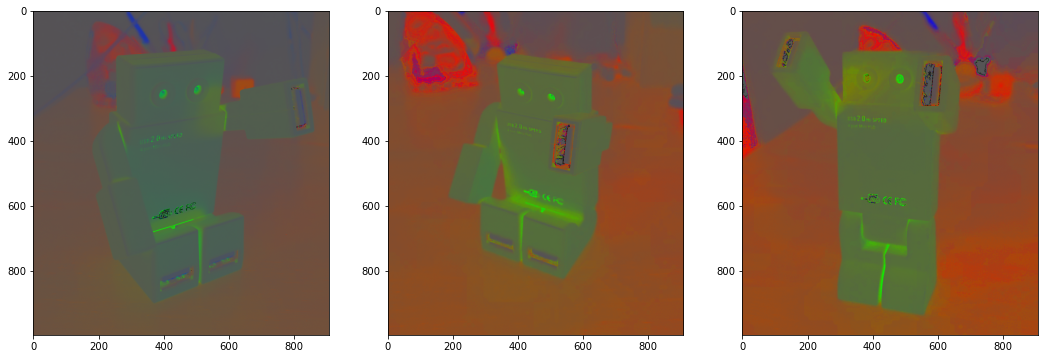

In [8]:
fig = plt.figure(figsize=(18, 12))

cc_n_1_bgr = cv.cvtColor(cc_n_1, cv.COLOR_RGB2BGR)
ax1=plt.subplot(131)
ax1.imshow(cc_n_1_bgr)
ax1.set_title('')

cc_n_2_bgr = cv.cvtColor(cc_n_2, cv.COLOR_RGB2BGR)
ax2=plt.subplot(132)
ax2.imshow(cc_n_2_bgr)
ax2.set_title('')

cc_n_3_bgr = cv.cvtColor(cc_n_3, cv.COLOR_RGB2BGR)
ax3=plt.subplot(133)
ax3.imshow(cc_n_3_bgr)
ax3.set_title('')

plt.show()